In [43]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import pickle
import pandas as pd
from tqdm import tqdm
import seaborn as sns

from graspy.plot import heatmap
from graspy.utils import symmetrize, is_symmetric

from mgcpy.independence_tests.mgc.mgc import MGC

from utils import estimate_block_assignment, to_distance_mtx, sort_graph, identity, block_permute

In [24]:
male = pd.read_csv('../data/celegans/male_chem_A_full_undirected.csv', header=None).values
herm = pd.read_csv('../data/celegans/herm_chem_A_full_undirected.csv', header=None).values
male_labels = np.squeeze(pd.read_csv('../data/celegans/male_chem_full_cells.csv', header=None).values)
herm_labels = np.squeeze(pd.read_csv('../data/celegans/herm_chem_full_cells.csv', header=None).values)

In [25]:
male_uw = np.where(male > 0, 1, 0).astype(float)
herm_uw = np.where(herm > 0, 1, 0).astype(float)

In [26]:
common_labels, male_idx, herm_idx = np.intersect1d(male_labels, herm_labels, return_indices=True)

male_idx = np.sort(male_idx)
herm_idx = np.sort(herm_idx)

male_sorted = male[np.ix_(male_idx, male_idx)]
herm_sorted = herm[np.ix_(herm_idx, herm_idx)]

male_uw_sorted = male_uw[np.ix_(male_idx, male_idx)]
herm_uw_sorted = herm_uw[np.ix_(herm_idx, herm_idx)]

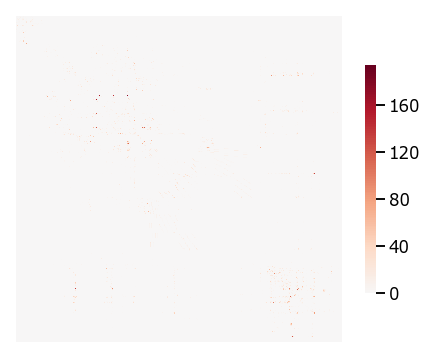

In [46]:
heatmap(male, figsize=(8, 6))

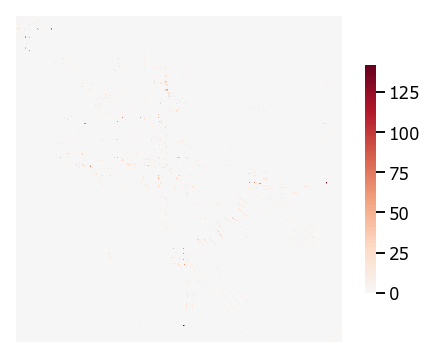

In [47]:
heatmap(herm, figsize=(8, 6))

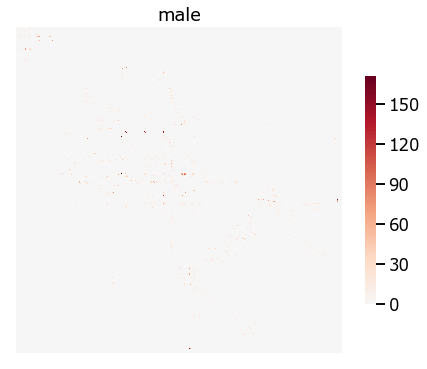

In [65]:
heatmap(male_sorted, figsize=(8, 6), title='male')

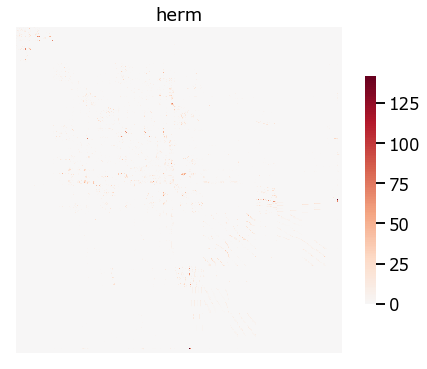

In [66]:
heatmap(herm_sorted, figsize=(8, 6), title='herm')

In [53]:
block_assignment = estimate_block_assignment(male_sorted, herm_sorted, k=20, set_k=False, num_repeats=10)

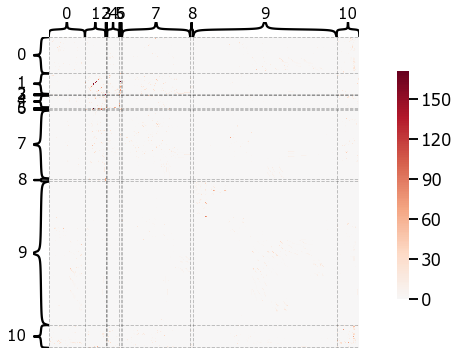

In [54]:
heatmap(male_sorted, inner_hier_labels=block_assignment, figsize=(8,6))

In [55]:
mgc = MGC(compute_distance_matrix=identity)

In [59]:
ta, _ = mgc.test_statistic(to_distance_mtx(male_sorted), to_distance_mtx(herm_sorted))
t0, _ = mgc.test_statistic(to_distance_mtx(block_permute(male_sorted, block_assignment)),
                   to_distance_mtx(sort_graph(herm_sorted, block_assignment)))

print('test stats under Ha: {}'.format(ta))
print('test stats under H0: {}'.format(t0))

test stats under Ha: 0.754370251626264
test stats under H0: 0.2863906723350771


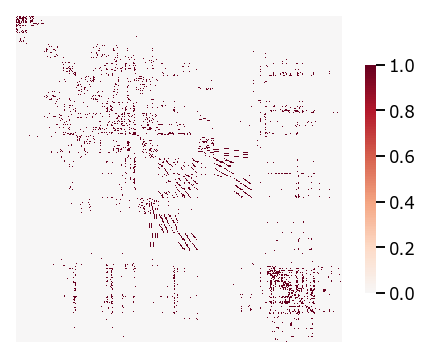

In [27]:
heatmap(male_uw, figsize=(8, 6))

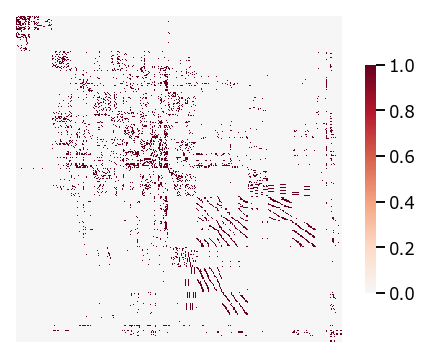

In [28]:
heatmap(herm_uw, figsize=(8,6))

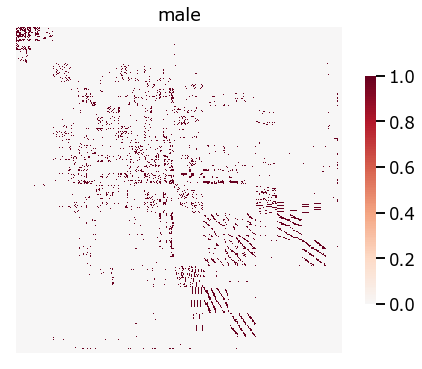

In [63]:
heatmap(male_uw_sorted, figsize=(8,6), title='male')

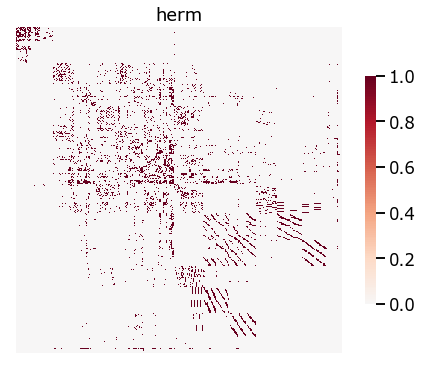

In [64]:
heatmap(herm_uw_sorted, figsize=(8,6), title='herm')

In [39]:
block_assignment = estimate_block_assignment(male_uw_sorted, herm_uw_sorted, k=10, set_k=False, num_repeats=10)

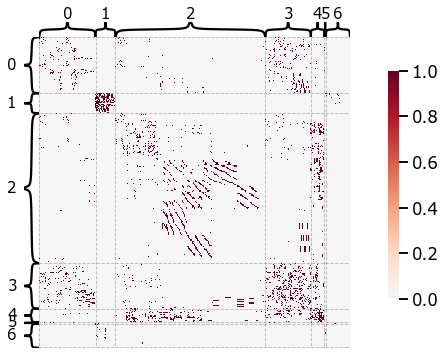

In [40]:
heatmap(male_uw_sorted, inner_hier_labels=block_assignment, figsize=(8,6))

In [36]:
mgc = MGC(compute_distance_matrix=identity)

In [60]:
ta, _ = mgc.test_statistic(to_distance_mtx(male_uw_sorted), to_distance_mtx(herm_uw_sorted))
t0, _ = mgc.test_statistic(to_distance_mtx(block_permute(male_uw_sorted, block_assignment)),
                   to_distance_mtx(sort_graph(herm_uw_sorted, block_assignment)))

print('test stats under Ha: {}'.format(ta))
print('test stats under H0: {}'.format(t0))

test stats under Ha: 0.6730454328718642
test stats under H0: 0.041573991209431296


[]

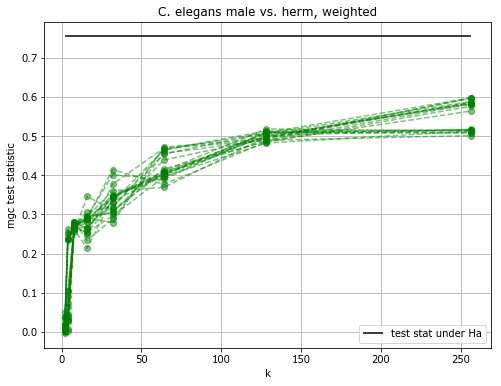

In [70]:
with open('../results/celegans_male_herm_weighted_teststats_null.pkl', 'rb') as f:
    null = pickle.load(f)
null = dict(null)

k_arr = np.logspace(start=1, stop=8, num=8, base=2, dtype=int)
test_stats_null_arr = np.zeros((k_arr.size, 20))
for i, k in enumerate(k_arr):
    test_stats_null_arr[i, :] = null[k]

mgc = MGC(compute_distance_matrix=identity)
test_stats_alt, _ = mgc.test_statistic(to_distance_mtx(male_sorted), to_distance_mtx(herm_sorted))
plt.figure(figsize=(8, 6))
for i in range(test_stats_null_arr.shape[1]):
    plt.plot(k_arr, test_stats_null_arr[:, i], color='g', marker='o', linestyle='--', alpha=0.5)
plt.hlines(y=test_stats_alt, xmin=min(k_arr), xmax=max(k_arr), label='test stat under Ha')
plt.xlabel('k')
plt.ylabel('mgc test statistic')
plt.title('C. elegans male vs. herm, weighted')
plt.legend(loc=4)
plt.grid()
plt.plot()

[]

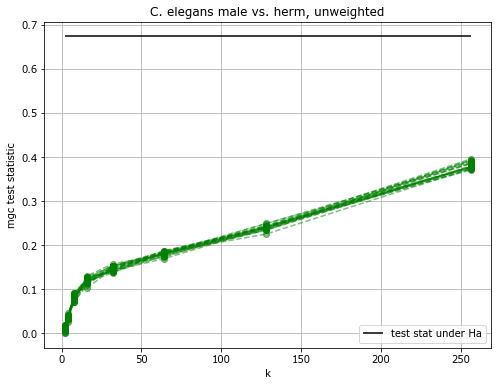

In [75]:
with open('../results/celegans_male_herm_unweighted_teststats_null.pkl', 'rb') as f:
    null = pickle.load(f)
null = dict(null)

k_arr = np.logspace(start=1, stop=8, num=8, base=2, dtype=int)
test_stats_null_arr = np.zeros((k_arr.size, 20))
for i, k in enumerate(k_arr):
    test_stats_null_arr[i, :] = null[k]

mgc = MGC(compute_distance_matrix=identity)
test_stats_alt, _ = mgc.test_statistic(to_distance_mtx(male_uw_sorted), to_distance_mtx(herm_uw_sorted))
plt.figure(figsize=(8, 6))
for i in range(test_stats_null_arr.shape[1]):
    plt.plot(k_arr, test_stats_null_arr[:, i], color='g', marker='o', linestyle='--', alpha=0.5)
plt.hlines(y=test_stats_alt, xmin=min(k_arr), xmax=max(k_arr), label='test stat under Ha')
plt.xlabel('k')
plt.ylabel('mgc test statistic')
plt.title('C. elegans male vs. herm, unweighted')
plt.legend(loc=4)
plt.grid()
plt.plot()